# Analyse av Titanic-datasettet som allerede finnes i seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from useful_tools import ModelTester

titanic = sns.load_dataset('titanic', dtype={'age': np.float64})

titanic.adult_male = titanic.adult_male.astype(int)
titanic.alone = titanic.alone.astype(int)

# Slett overflødige kolonner
titanic.drop(['sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], axis=1, inplace=True)

# Sett manglende aldre til å være medianen
median_age = titanic.age.dropna().median()
if len(titanic.age[titanic.age.isnull()]) > 0:
    titanic.loc[titanic.age.isnull(), 'age'] = median_age
    
titanic.head()

,survived,pclass,age,fare,adult_male,alone
0,0,3,22.0,7.2500,1,0
1,1,1,38.0,71.2833,0,0
2,1,3,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,0
4,0,3,35.0,8.0500,1,1


## Deler opp i trening- og testsett

In [3]:
titanic_vars = titanic.drop(['survived'], axis=1)
titanic_response = titanic[['survived']]

np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(titanic_vars, titanic_response, test_size=0.2)

survived = x_train.loc[y_train.survived == 1]
died = x_train.loc[y_train.survived == 0]

tester = ModelTester(x_test, y_test)

## Undersøkelse av treningssettet

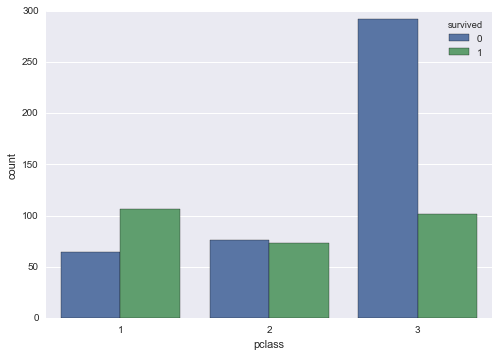

In [4]:
sns.countplot(x_train.pclass, hue=y_train.survived)
plt.show()

Ut ifra dette, ser det ut til at klassen menneskene var passasjerer på, har innvirkning på om de overlevde eller ikke. Vi prøver å predikere overlevelse basert på klassen.

Confusion matrix, without normalization


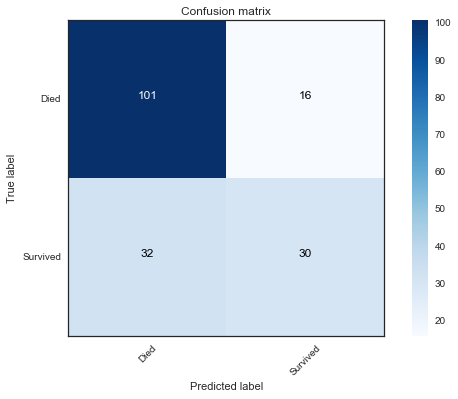

Accuracy:  73.1843575419 %


In [73]:
relevant_variables = ['pclass']

tree = DecisionTreeClassifier()
tree.fit(x_train[relevant_variables], y_train)

tester.test_classifier(tree, class_names=['Died', 'Survived'], features=relevant_variables)

# Videre undersøkning av datasettet

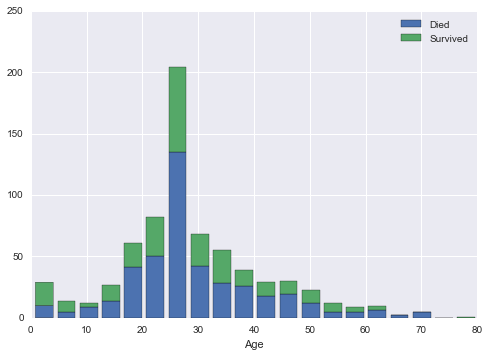

In [68]:
plt.hist([died.age, survived.age], stacked=True, normed=False, bins=20, label=['Died', 'Survived'])
plt.legend()
plt.xlabel('Age')
plt.show()

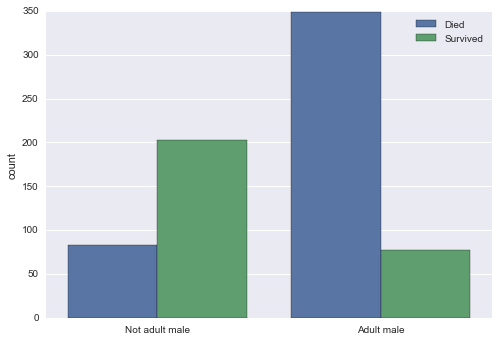

In [74]:
ax = sns.countplot(x_train.adult_male, hue=y_train.survived)
ax.set_xticklabels(['Not adult male', 'Adult male'])
l = plt.legend(labels=['Died', 'Survived'])
plt.xlabel('')
plt.show()

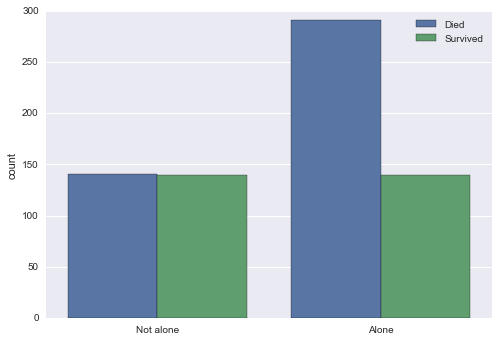

In [75]:
ax = sns.countplot(x_train.alone, hue=y_train.survived)
ax.set_xticklabels(['Not alone', 'Alone'])
l = plt.legend(labels=['Died', 'Survived'])
plt.xlabel('')
plt.show()

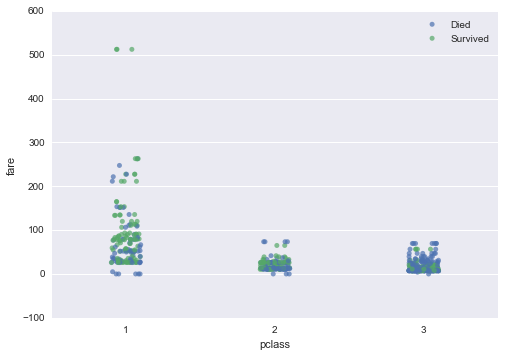

In [76]:
sns.stripplot(x_train.pclass, x_train.fare, jitter=True, alpha=0.7, hue=y_train.survived)
l = plt.legend(labels=['Died', 'Survived'])
plt.show()

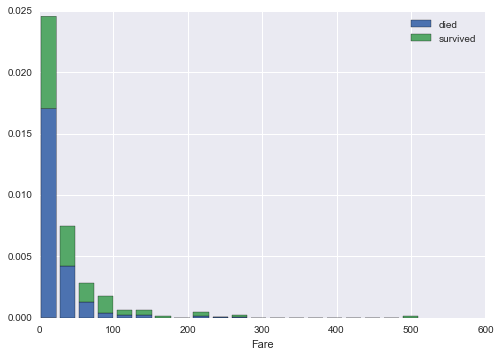

In [6]:
plt.hist([died.fare, survived.fare], stacked=True, normed=True, bins=20, label=['Died', 'Survived'])
plt.xlabel('Fare')
plt.legend()
plt.show()

## Kan vi gjøre det bedre?

Confusion matrix, without normalization


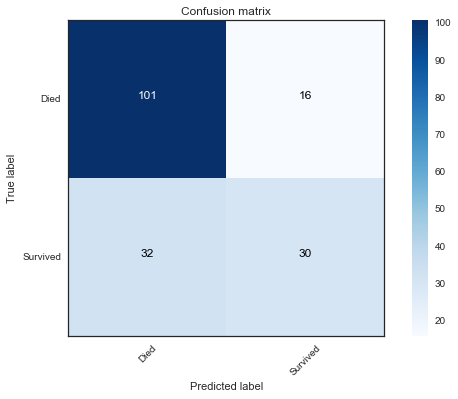

Accuracy:  73.1843575419 %


In [70]:
# Legg til variable i lista
# Spoiler: pclass og adult_male gir accuracy på 86 %
relevant_variables = ['pclass']

tree = DecisionTreeClassifier()
tree.fit(x_train[relevant_variables], y_train)

tester.test_classifier(tree, class_names=['Died', 'Survived'], features=relevant_variables)